# Imports & file locations

Matplotlib Backend: module://ipykernel.pylab.backend_inline


-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
plot_constants      NA
plot_util

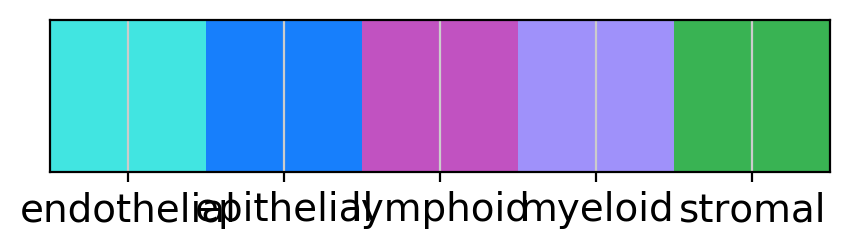

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

## Matplotlibrc

In [2]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [3]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [4]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [5]:
groupby = "narrow_group"
species = "species"

tissue = "muscle"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [6]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__april2021__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 133 ms, sys: 44.3 ms, total: 177 ms
Wall time: 312 ms


AnnData object with n_obs × n_vars = 5777 × 12875
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'channel_10x', 'compartment', 'method', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'lemur_name', 'lemur_renamed', 'cell_id_lemur_renamed'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'name-lemur', 'highly_variable-lemur', 'n_cells-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_group_name_colors', 'den

## Make CrossSpeciesComparison object

In [7]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow                            species    
stromal: fast muscle cell                     Mouse           144
                                              Mouse Lemur      39
                                              Human           220
stromal: skeletal muscle satellite stem cell  Mouse          1161
                                              Mouse Lemur      75
                                              Human          2121
stromal: tendon cell                          Mouse          1899
                                              Mouse Lemur      42
                                              Human            76
dtype: int64


extracting highly variable genes



------- group: stromal: fast muscle cell -------
number of cells: 403


computing PCA
    on highly variable genes
    with n_comps=50


Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


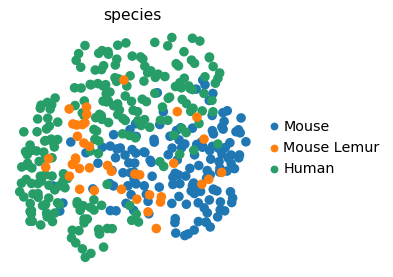

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: stromal: skeletal muscle satellite stem cell -------
number of cells: 3357


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3002


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


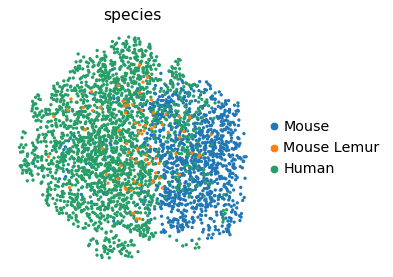

extracting highly variable genes



------- group: stromal: tendon cell -------
number of cells: 2017


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2908


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


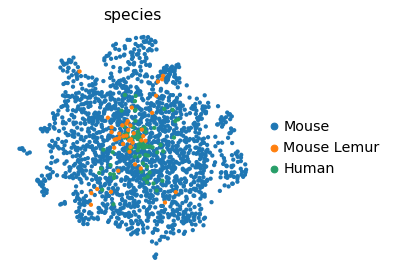

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: fast muscle cell -------
number of cells: 403
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


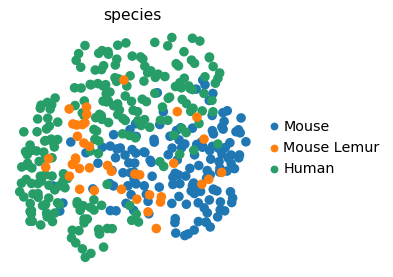

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: stromal: skeletal muscle satellite stem cell -------
number of cells: 3357

 Number of highly variable genes: 3002


    with n_comps=50
    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


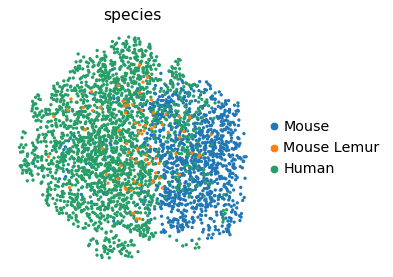

extracting highly variable genes



------- group: stromal: tendon cell -------
number of cells: 2017


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2908


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


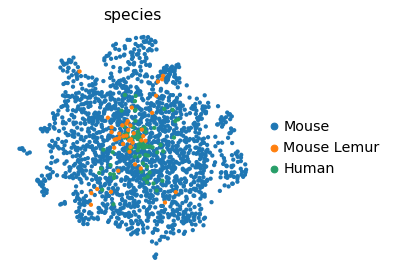

extracting highly variable genes



------- group: Mouse -------
number of cells: 3204


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2852


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


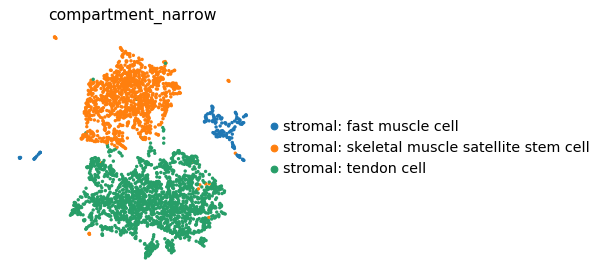

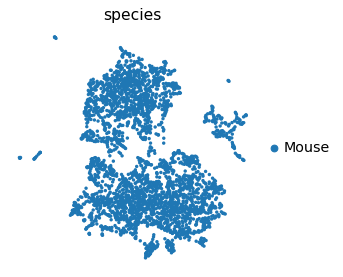

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP



------- group: Mouse Lemur -------
number of cells: 156
Scanpy had an error when computing highly variable genes, using previous ones


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


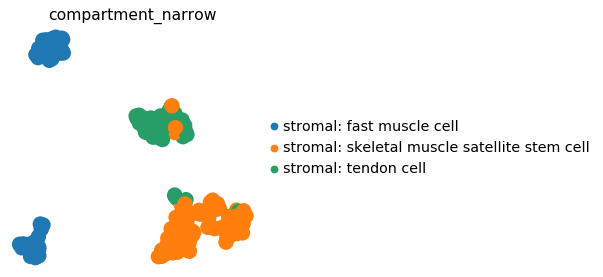

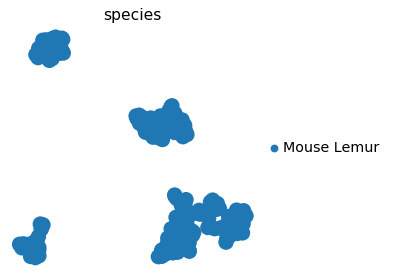

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: Human -------
number of cells: 2417

 Number of highly variable genes: 3015


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


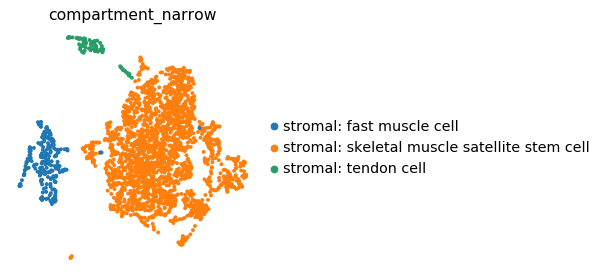

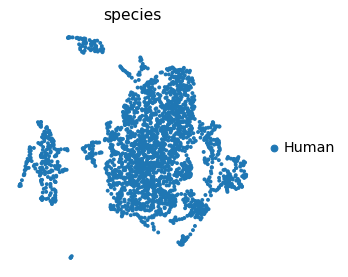

In [8]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas()

## Do differential expression

ranking genes



------- group: stromal: fast muscle cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed 

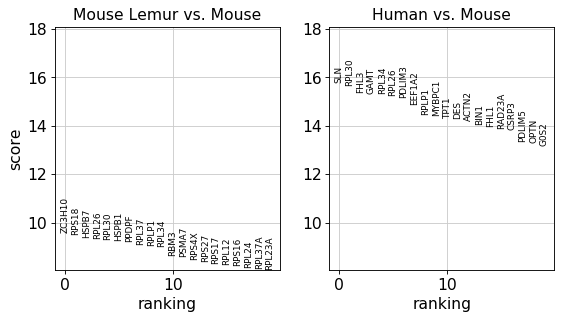

ranking genes



------- group: stromal: skeletal muscle satellite stem cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


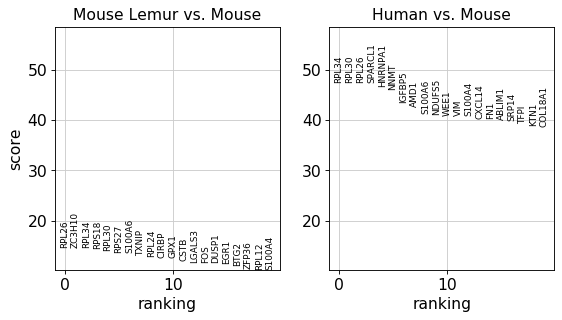

ranking genes



------- group: stromal: tendon cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


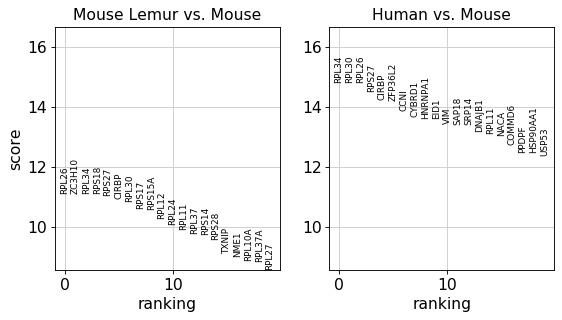

In [9]:
cross_species.do_differential_expression(method='wilcoxon')

## Make differential expression results info tables

In [10]:
cross_species.get_per_group_diffexpr_tables?

Signature: cross_species.get_per_group_diffexpr_tables(dissociation_genes=None)
Docstring: <no docstring>
File:      ~/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/xspecies.py
Type:      method


### Get list of dissociation genes

In [11]:
dissociation_genes = set(pd.read_csv('/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv', index_col=0, squeeze=True))
len(dissociation_genes)

1880

### Aggregate differential expression, indicating whether a gene is associated with dissociation

In [12]:
group_diffexpr_info = {
    group: diffexpr_info 
    for group, diffexpr_info in cross_species.get_per_group_diffexpr_tables(
        dissociation_genes=dissociation_genes
    )
}


------- group: stromal: fast muscle cell -------

------- group: stromal: skeletal muscle satellite stem cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: stromal: tendon cell -------


### Write full results to google drive

In [13]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_full_results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info.to_excel(writer, sheet_name=sheet_name)

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


### Write filtered results to google drive

In [14]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_filtered__pval<0.05__same_logfoldchange_direction__results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info_filtered = cross_species.filter_diffexpr_info(diffexpr_info)
        diffexpr_info_filtered.to_excel(writer, sheet_name=sheet_name)

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [15]:
diffexpr_info_filtered

logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
ABCA6          5.495567    6.590774  2.897898e-07  4.854832e-02   
ABI3BP       -25.054361  -23.149885  1.084100e-36  4.822056e-18   
ACTA1          2.982388    7.572376  1.629733e-06  1.814886e-02   
ACTR3         -2.535690   -2.666795  2.302391e-04  5.707653e-04   
ADAMTS1       -5.120265   -3.307471  2.005027e-04  4.136393e-02   
...                 ...         ...           ...           ...   
YPEL3          3.269870    5.806190  5.477552e-10  2.409547e-03   
YRDC          -3.126587  -30.507961  1.773544e-02  1.759194e-02   
YWHAH         -3.209471   -5.473336  2.281884e-04  2.581195e-05   
ZBTB16         2.101100   11.944968  1.768602e-05  8.582747e-08   
ZFP36         33.836422   48.277290  3.149295e-18  2.282422e-11   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
ABCA6               6.537917    1.313826   5.706289    2.982992   
ABI3BP             35.964931   17.316768 -13.136998   -9.282987   
ACTA1               5.787883    1.741151   5.381467    3.315054   
ACTR3               3.637821    3.243542  -4.309256   -4.282432   
ADAMTS1             3.697880    1.383378  -4.343615   -3.038522   
...                      ...         ...        ...         ...   
YPEL3               9.261414    2.618065   6.746090    3.909593   
YRDC                1.751158    1.754686  -3.063710   -3.325910   
YWHAH               3.641706    4.588179  -4.311717   -4.980097   
ZBTB16              4.752370    7.066374   4.894079    6.059368   
ZFP36              17.501787   10.641604   9.194617    7.337236   

          is_dissociation_gene  
species                         
gene_name                       
ABCA6                    False  
ABI3BP                   False  
ACTA1                     True  
ACTR3                    False  
ADAMTS1                  False  
...                        ...  
YPEL3                     True  
YRDC                     False  
YWHAH                    False  
ZBTB16                   False  
ZFP36                     True  

[431 rows x 9 columns]

## Concatenate differential expression info

In [16]:
dfs = []

for group, diffexpr_info in group_diffexpr_info.items():
    df = diffexpr_info.copy()
    df['group'] = group
    dfs.append(df)
diffexpr_aggregated = pd.concat(dfs)
diffexpr_aggregated.head()

logfoldchange             pval_adj             pval_adj_neg_log10  \
species           Human Mouse Lemur    Human Mouse Lemur              Human   
gene_name                                                                     
A1BG           0.000000    0.000000      1.0         1.0                0.0   
A2M           23.874964    0.000000      1.0         1.0                0.0   
A3GALT2        0.000000    0.000000      1.0         1.0                0.0   
A4GALT         1.631034    2.901365      1.0         1.0                0.0   
AAAS           1.307327   -0.107519      1.0         1.0                0.0   

                          score             is_dissociation_gene  \
species   Mouse Lemur     Human Mouse Lemur                        
gene_name                                                          
A1BG              0.0  0.000000    0.000000                False   
A2M               0.0  0.220042    0.000000                False   
A3GALT2           0.0  0.000000    0.000000                False   
A4GALT            0.0  0.255187    0.180611                False   
AAAS              0.0  0.694252   -0.085194                 True   

                               group  
species                               
gene_name                             
A1BG       stromal: fast muscle cell  
A2M        stromal: fast muscle cell  
A3GALT2    stromal: fast muscle cell  
A4GALT     stromal: fast muscle cell  
AAAS       stromal: fast muscle cell

## Volcano plot (pval vs logfoldchange)

### Reformat to tidy dataframe

In [17]:
diffexpr_aggregated_tidy = diffexpr_aggregated.stack().reset_index()
diffexpr_aggregated_tidy['species'] = diffexpr_aggregated_tidy['species'].replace('', np.nan)
diffexpr_aggregated_tidy.is_dissociation_gene = diffexpr_aggregated_tidy.is_dissociation_gene.fillna(method='backfill')
diffexpr_aggregated_tidy.group = diffexpr_aggregated_tidy.group.fillna(method='backfill')
diffexpr_aggregated_tidy.head()

,gene_name,species,logfoldchange,pval_adj,pval_adj_neg_log10,score,is_dissociation_gene,group
0,A1BG,Human,0.000000,1.0,0.0,0.000000,False,stromal: fast muscle cell
1,A1BG,Mouse Lemur,0.000000,1.0,0.0,0.000000,False,stromal: fast muscle cell
2,A1BG,NaN,NaN,NaN,NaN,NaN,False,stromal: fast muscle cell
3,A2M,Human,23.874964,1.0,0.0,0.220042,False,stromal: fast muscle cell
4,A2M,Mouse Lemur,0.000000,1.0,0.0,0.000000,False,stromal: fast muscle cell


In [18]:
sns.set_context('paper')

In [19]:
'logfoldchange_threshold'.upper()

'LOGFOLDCHANGE_THRESHOLD'

In [20]:
'neg_log10_pvalue_threshold'.upper()

'NEG_LOG10_PVALUE_THRESHOLD'

In [21]:
LOGFOLDCHANGE_THRESHOLD = 20
NEG_LOG10_PVALUE_THRESHOLD = 10

In [22]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

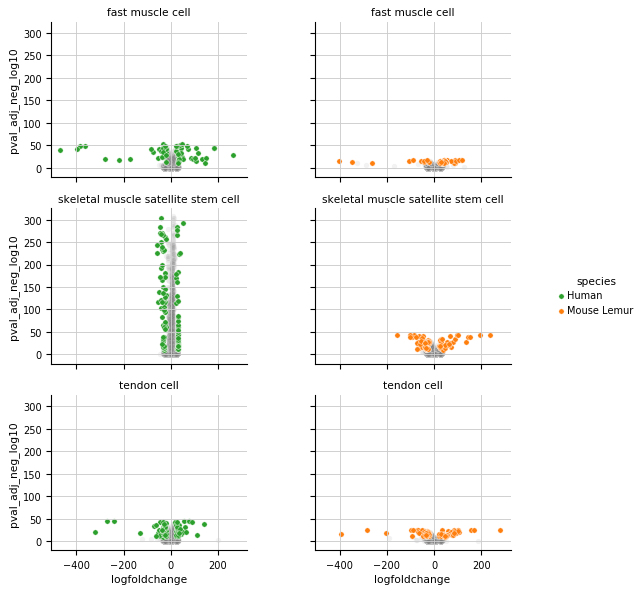

In [23]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

def scatterplot_significance(
    x,
    y,
    *args,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
    **kwargs
):
    logfoldchange_mask = x.abs() > logfoldchange_threshold
    pvalue_mask = y > neg_log10_pvalue_threshold
    significance_mask = logfoldchange_mask & pvalue_mask

    # Plot insignificant in grey with low alpha (transparent)
    sns.scatterplot(
        x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
    )

    # Plot significant genes in color with no alpha
    sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


g = sns.FacetGrid(
    diffexpr_aggregated_tidy,
    col="species",
    hue="species",
    row="group",
    aspect=1.4,
    height=2.5,
    palette=[human_color, lemur_color],
)
g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", rasterized=True)
g.set_titles("{row_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    title = title.split(":")[-1].strip()
    ax.set_title(title)
g.add_legend()
g.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
)

# Get constitutive genes to ignore in figures

In [69]:
lung_csv = os.path.join(GDRIVE_ANALYSIS_DIR, f'{tissue}/binarized/per_gene_categorization__{tissue}__narrow_group.csv')
! ls -lha $lung_csv
lung_gene_categories = pd.read_csv(lung_csv, index_col=0)
lung_gene_categories.head()

ls: cannot access '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/muscle/binarized/per_gene_categorization__muscle__narrow_group.csv': No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/muscle/binarized/per_gene_categorization__muscle__narrow_group.csv'

In [60]:
lung_gene_categories.gene_category.value_counts()

Other                                                        4107
Nearly constitutively expressed in all three species         1833
Human-specific, celltype-specific                            1701
Constitutively expressed in all three species                1313
Lemur-specific, celltype-specific                             606
Expansion to primates                                         474
Mouse-specific, celltype-specific, lemur=human                447
Conserved, celltype-specific in all three species             182
Contraction in human from constitutive in mouse and lemur     129
Expansion to constitutive in primates, lemur=human            129
Contraction in primates                                       118
Contraction in primates, lemur=human                          106
Expansion to constitutive in human                             98
Celltype-switching, lemur closer to mouse                      60
Constitutively expressed in Human only                         27
Constituti

In [61]:
# constitutive_strings =
constitutive_strings = (
    "Constitutively expressed in Primates, lemur=human",
    "Expansion to constitutive in primates, lemur=human",
    "Nearly constitutively expressed in all three species",
    "Constitutively expressed in all three species",
)

lung_gene_categories_primate_constitutive = lung_gene_categories.query(
    "gene_category in @constitutive_strings"
)
lung_gene_categories_primate_constitutive.head()

,bitscore,gene_category,tissue,celltype_group
gene_name,,,,
AAK1,0111111111111111111111111111111111111111111111...,"Expansion to constitutive in primates, lemur=h...",lung,narrow_group
AAMP,1111111111111111111111111111111111111111111111...,Constitutively expressed in all three species,lung,narrow_group
AASDHPPT,1011111111111111111111111111111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group
AATF,0011011011011011111111111011111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group
ABCE1,1011111111011111111111111111111111111111111111...,Nearly constitutively expressed in all three s...,lung,narrow_group


In [62]:
constitutive_genes_for_plotting = lung_gene_categories_primate_constitutive.index.intersection(diffexpr_aggregated_pct_expr_filtered.index)

## Plot logfoldchange

In [24]:
pvalue_mask = (diffexpr_aggregated['pval_adj_neg_log10'] > NEG_LOG10_PVALUE_THRESHOLD).any(axis=1)
logfoldchange_mask = (diffexpr_aggregated['logfoldchange'].abs() > LOGFOLDCHANGE_THRESHOLD).any(axis=1)
diffexpr_aggregated_significant = diffexpr_aggregated.loc[pvalue_mask & logfoldchange_mask]
diffexpr_aggregated_significant

logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
ACTA1               NaN        -inf  8.093858e-33  5.230868e-03   
ACTN2         32.234108   32.464382  3.311253e-43  3.745611e-12   
ACTN3        -75.102394  -67.477654  7.652540e-35  7.340661e-10   
AK1          -20.264526  -11.929032  1.288767e-36  5.145617e-04   
AKR1B1        33.428574   29.515326  2.067481e-18  1.000000e+00   
...                 ...         ...           ...           ...   
VIM          140.033234  -12.541812  2.456124e-38  6.940619e-01   
XRCC5          4.606784  -27.422998  4.284707e-14  1.000000e+00   
ZC3H10         1.496972  170.435165  6.676944e-01  4.419029e-25   
ZFP36         33.836422   48.277290  3.149295e-18  2.282422e-11   
ZFP36L2       28.325262    3.066183  1.154179e-42  1.000000e+00   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
ACTA1              32.091844    2.281426  12.373281   -3.843946   
ACTN2              42.480008   11.426477  14.224791    7.704930   
ACTN3              34.116194    9.134265 -12.749186   -6.941594   
AK1                35.889826    3.288563 -13.076193   -4.433487   
AKR1B1             17.684558    0.000000   9.241759    0.490716   
...                      ...         ...        ...         ...   
VIM                37.609750    0.158602  13.434129   -1.758565   
XRCC5              13.368079    0.000000   8.066713   -0.654661   
ZC3H10              0.175422   24.354673   1.246366   11.100004   
ZFP36              17.501787   10.641604   9.194617    7.337236   
ZFP36L2            41.937727    0.000000  14.208902    1.359005   

          is_dissociation_gene                      group  
species                                                    
gene_name                                                  
ACTA1                     True  stromal: fast muscle cell  
ACTN2                    False  stromal: fast muscle cell  
ACTN3                    False  stromal: fast muscle cell  
AK1                      False  stromal: fast muscle cell  
AKR1B1                   False  stromal: fast muscle cell  
...                        ...                        ...  
VIM                       True       stromal: tendon cell  
XRCC5                    False       stromal: tendon cell  
ZC3H10                   False       stromal: tendon cell  
ZFP36                     True       stromal: tendon cell  
ZFP36L2                   True       stromal: tendon cell  

[754 rows x 10 columns]

In [25]:
xlsx_significant = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression__significant_only.xlsx",
)

diffexpr_aggregated_significant.to_excel(xlsx_significant)

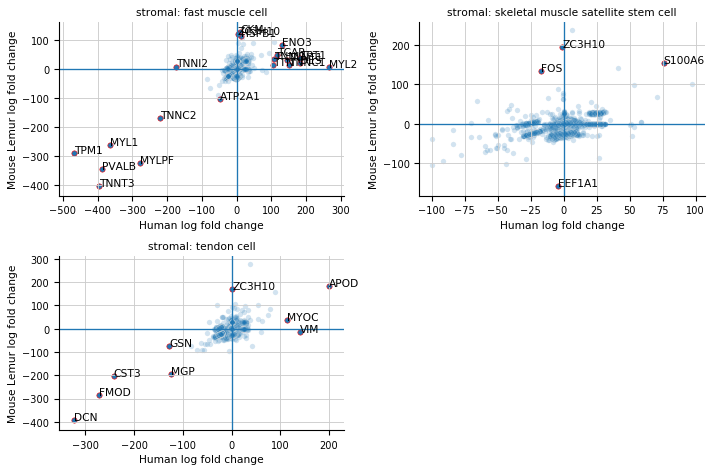

In [67]:
from adjustText import adjust_text


def add_gene_names(
    x,
    y,
    *args,
    genes_to_label=None,
    significance_multiplier=2,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    do_adjust_text=True,
    **kwargs,
):
    threshold = logfoldchange_threshold * significance_multiplier
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]
    # Set to all genes
    genes_to_label = set(x.index) if genes_to_label is None else genes_to_label

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        if (abs(x0) > threshold or abs(y0) > threshold) and (
            not_ribosomal and gene_name in genes_to_label
        ):
            text = plt.annotate(gene_name, (x0, y0))
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            #             text = plt.text(x0, y0, ' ')
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, edgecolor="red", rasterized=True )
    ax = plt.gca()

    # Get the points already plotted to avoid
    if do_adjust_text:
        scatter = ax.collections
        adjust_text(
            texts,
            np.asarray(xs_plotted),
            np.asarray(ys_plotted),
            #         add_objects=scatter,
            #         # Decrease precision
            #         precision=0.5,
            #         # Increase number of iterations
            #         lim=5000,
            # Add arrow
            #         save_steps=True,
            arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
        )
    ax.axhline()
    ax.axvline()


g = sns.FacetGrid(
    data=diffexpr_aggregated,
    col="group",
    aspect=1.5,
    col_wrap=2,
    sharex=False,
    sharey=False,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    alpha=0.2,
    rasterized=True,
)
# g.set(ylim=[-650, 100])
g.map(
    add_gene_names,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    significance_multiplier=5,
    do_adjust_text=False,
)
g.set_titles("{col_name}")
g.set(xlabel="Human log fold change", ylabel="Mouse Lemur log fold change")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf")
)

## Check with muscle disease genes

In [34]:
muscle_disease_genes = '''CAPN3
CAV3
DYSF
DTNA
DTNB
DAG1
DMD
DRP2
EMD
FKTN
FKRP
GNE
LMNA
LAMA2
MYOT
PLEC
POMT1
POMT2
POMGNT1
POMGNT2
LARGE
ISPD
DAG1
TMEM5
B3GALNT2
POMK
B3GNT1
GMPPB
SGCA
SGCB
SGCG
SGCD
SGCE
SGCZ
SNTA1
TCAP
TTN
TRIM32
UTRN
ANO5
SOD1
TARDBP
FUS 
SMN1 
UBA1 
DYNC1H1
DMPK 
CNBP 
MBNL1 
COL6A1
COL6A2
COL6A3
SMCHD1 
PABPN1
MTM1 
DUX4
AR
DES
SEPN1
CHKB
SMCHD1 
PLEC
SYNE1
PTRF
GMPPB
LIMS2
MYH7
FHL1 
TIA1
VCP
ITGA7
TMEM43
COL12A1
TRIP4
TOR1AIP1
INPP5K
POPDC3
CHRNA1
SMN1
SMN2
VAPB'''.split()
muscle_disease_genes = sorted(list(set(muscle_disease_genes)))
len(muscle_disease_genes)

76

In [45]:
muscle_disease_genes_in_diffexpr = list(diffexpr_aggregated.index.intersection(muscle_disease_genes))
# muscle_disease_genes_in_diffexpr

In [36]:
diffexpr_aggregated.head()

logfoldchange             pval_adj             pval_adj_neg_log10  \
species           Human Mouse Lemur    Human Mouse Lemur              Human   
gene_name                                                                     
A1BG           0.000000    0.000000      1.0         1.0                0.0   
A2M           23.874964    0.000000      1.0         1.0                0.0   
A3GALT2        0.000000    0.000000      1.0         1.0                0.0   
A4GALT         1.631034    2.901365      1.0         1.0                0.0   
AAAS           1.307327   -0.107519      1.0         1.0                0.0   

                          score             is_dissociation_gene  \
species   Mouse Lemur     Human Mouse Lemur                        
gene_name                                                          
A1BG              0.0  0.000000    0.000000                False   
A2M               0.0  0.220042    0.000000                False   
A3GALT2           0.0  0.000000    0.000000                False   
A4GALT            0.0  0.255187    0.180611                False   
AAAS              0.0  0.694252   -0.085194                 True   

                               group  
species                               
gene_name                             
A1BG       stromal: fast muscle cell  
A2M        stromal: fast muscle cell  
A3GALT2    stromal: fast muscle cell  
A4GALT     stromal: fast muscle cell  
AAAS       stromal: fast muscle cell

### label with just muscle disease genes

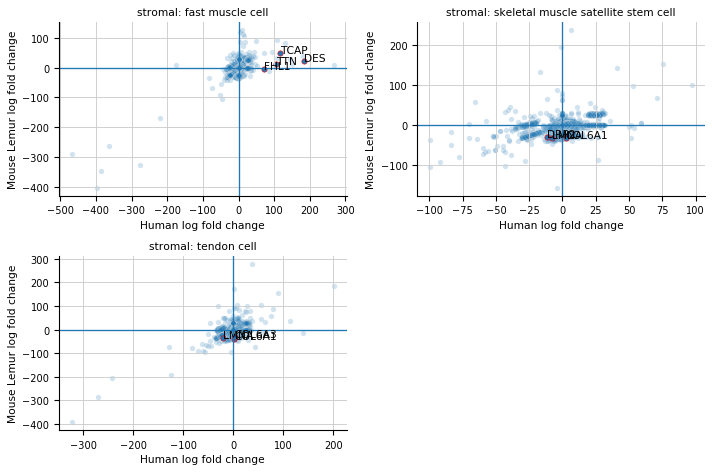

In [60]:



g = sns.FacetGrid(
    data=diffexpr_aggregated,
    col="group",
    aspect=1.5,
    col_wrap=2,
    sharex=False,
    sharey=False,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    alpha=0.2,
)
# g.set(ylim=[-650, 100])
g.map(add_gene_names, 
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    genes_to_label=muscle_disease_genes_in_diffexpr,
    significance_multiplier=1,
      logfoldchange_threshold=30,
)
g.set_titles("{col_name}")
g.set(xlabel="Human log fold change", ylabel="Mouse Lemur log fold change")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf")
)

In [62]:
xlsx = os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__muscle_disease_genes.xlsx")

diffexpr_aggregated.loc[muscle_disease_genes_in_diffexpr].to_excel(xlsx)

In [32]:
len(set(muscle_disease_genes))

76

## Get genes changing in both human-mouse and lemur-mouse comparisons, find primate gain and loss

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


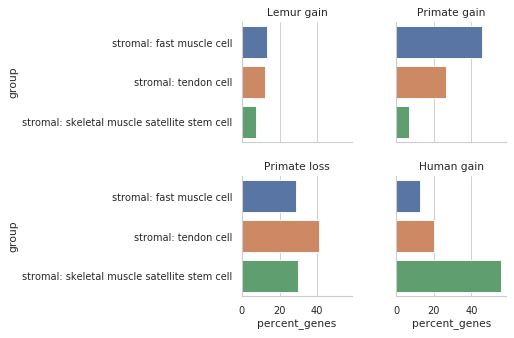

In [79]:
diffexpr_aggregated_changing = diffexpr_aggregated_significant.loc[
    (diffexpr_aggregated_significant.logfoldchange != 0).all(axis=1)
].dropna()
diffexpr_aggregated_changing.shape

str_to_quadrant = {
    "True-True": "Primate gain",
    "False-False": "Primate loss",
    "True-False": "Human gain",
    "False-True": "Lemur gain",
}

diffexpr_aggregated_changing["primate_category"] = (
    (diffexpr_aggregated_changing.logfoldchange > 0)
    .apply(lambda x: "-".join(map(str, x)), axis=1)
    .map(str_to_quadrant)
)
diffexpr_aggregated_changing.head()

sns.set(context="paper", style="whitegrid")

diffexpr_aggregated_changing.group.value_counts()

diffexpr_aggregated_changing_primate_categories = diffexpr_aggregated_changing.groupby(
    ["group"]
).primate_category.value_counts()
diffexpr_aggregated_changing_primate_categories.head()

diffexpr_aggregated_changing_primate_categories_percent = (
    diffexpr_aggregated_changing_primate_categories.groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    )
)
diffexpr_aggregated_changing_primate_categories_percent.name = "percent_genes"
diffexpr_aggregated_changing_primate_categories_percent = (
    diffexpr_aggregated_changing_primate_categories_percent.reset_index()
)

diffexpr_aggregated_changing_primate_categories_percent.head()

primate_gain = diffexpr_aggregated_changing_primate_categories_percent.query(
    'primate_category == "Primate gain"'
)
primate_gain = primate_gain.sort_values("percent_genes", ascending=False)
primate_gain

primate_loss = diffexpr_aggregated_changing_primate_categories_percent.query(
    'primate_category == "Primate loss"'
)
primate_loss = primate_loss.sort_values("percent_genes", ascending=False)
primate_loss

# g = sns.catplot(
#     data=diffexpr_aggregated_changing_primate_categories_percent,
#     hue="primate_category",
#     y="group",
#     x='percent_genes',
#     kind='bar',
#     order=primate_gain.group,
#     height=5,
#     aspect=1.25,
# )
# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
# )

g = sns.catplot(
    data=diffexpr_aggregated_changing_primate_categories_percent,
    col="primate_category",
    y="group",
    x="percent_genes",
    kind="bar",
    order=primate_gain.group,
    height=2,
    aspect=1,
    sharey=True,
    col_wrap=2,
    col_order=["Lemur gain", "Primate gain", "Primate loss", "Human gain"],
)
# g.fig.tight_layout()
g.set_titles('{col_name}')
g.savefig(
    os.path.join(
        figure_folder_base,
        f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf",
    )
)

In [ ]:
cross_species.mini_adatas.keys()

In [ ]:
group = 'stromal: skeletal muscle cell'
ad = cross_species.mini_adatas[group]

In [ ]:
ad

In [ ]:
de_scores = cross_species.extract_de_scores(ad)
de_scores.head()

In [ ]:
de_scores.tail()

In [ ]:
sns.distplot(de_scores)

In [ ]:
de_scores.describe()

In [ ]:
de_names = cross_species.extract_de_names(ad)
de_names.head()

In [ ]:
(de_scores.abs() > 1e-3).sum()

In [ ]:
abs_score_threshold = 1e-3

In [ ]:
score_mask = de_scores.abs() > abs_score_threshold
de_names = de_names[score_mask].dropna(how='all')
de_names.head()

In [ ]:
de_names

In [ ]:
de_names.shape

In [ ]:
gene_names = cross_species.get_differentially_expressed_gene_names(
    ad, "alphabetically", abs_score_threshold=1e-3
)
print(len(gene_names))
gene_names

In [ ]:
gene_names = cross_species.get_differentially_expressed_gene_names(
    ad, "score", abs_score_threshold=1e-3
)
print(len(gene_names))
gene_names

In [ ]:
gene_names

In [ ]:
figure_folder_base

In [ ]:
save_folder = os.path.join(figure_folder_base, 'dotplots')
! mkdir -p $save_folder
sc.settings.figdir = save_folder

## Dotplots of primate loss of expresion

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=False,
    save=True,
    save_format='pdf' 
    
)

## Dotplots of primate gain of expression

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=True,
    save=True,
    save_format='pdf' 
    
)

## Read Muscle disease genes

In [ ]:
muscle_disease_genes_df = pd.read_excel(
    "/home/olga/googledrive/TabulaMicrocebus/data/muscle-disease-genes-for-lemur.xlsx",
    sheet_name="Muscle Disease Genes",
    skiprows=1,
    engine="openpyxl",
)
muscle_disease_genes_df.head()

### Subset to only disease genes in adata

In [ ]:
disease_gene_names = [x.strip() for x in muscle_disease_genes_df.Symbol.unique() if isinstance(x, str)]
len(disease_gene_names)

In [ ]:
disease_gene_names_in_adata = [x for x in disease_gene_names if x in adata.var.index]
len(disease_gene_names_in_adata)

### Make dotplots of muscle disease genes

In [ ]:
cross_species.dotplots(
    disease_gene_names_in_adata, save="__muscle_disease_genes", save_format="pdf", max_genes=32,
)

## Muscle stem cell genes

In [ ]:
muscle_stem_cell_genes_df = pd.read_excel(
    "/home/olga/googledrive/TabulaMicrocebus/data/muscle-disease-genes-for-lemur.xlsx",
    sheet_name="Muscle Stem Cell Genes",
    skiprows=3,
    engine="openpyxl",
)
muscle_stem_cell_genes_df.head()

### Subset to only muscle stem cell genes in adata

In [ ]:
muscle_stem_cell_gene_names = [
    x.strip() for x in muscle_stem_cell_genes_df.Symbol.unique() if isinstance(x, str)
]
print(len(muscle_stem_cell_gene_names))

muscle_stem_cell_gene_names_in_adata = [x for x in muscle_stem_cell_gene_names if x in adata.var.index]
len(muscle_stem_cell_gene_names_in_adata)

### Make dotplots of muscle disease genes

In [ ]:
cross_species.dotplots(
    muscle_stem_cell_gene_names_in_adata, save_suffix="__muscle_stem_cell_genes", save_format="pdf"
)

## Dotplolts

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species-lung/across-species-within-group-diffexpr/ligand_groups'
# ! rm -rf $outdir_gdrive
! mkdir $outdir_gdrive

sc.set_figure_params(
    dpi=200, dpi_save=300, transparent=True, vector_friendly=True, frameon=False
)


for ligand, index in ligand_groups_primate.items():
    print(f'--- {ligand} ---')

    ligands_of_receptors = receptor_ligand_pairs_primate.loc[index]
    
    receptor_subset = sorted(list(ligands_of_receptors[receptor_col].unique()))
    ligand_subset = sorted(list(ligands_of_receptors[ligand_col].unique()))
    gene_subset = ligand_subset + receptor_subset
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
    
    save_dir = f'{outdir_gdrive}/ligand-centric/{ligand}/'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=ligand)
